In [2]:
%matplotlib inline
import pandas as pd

In [3]:
compras_df = pd.read_csv('/content/drive/MyDrive/pagos_provedores_monterrey/data/compras_df_enriched')

## Probar un modelo supervisado

In [4]:
data = compras_df.copy()
for i, columns in enumerate(list([str(d) for d in data.dtypes])):
    if columns == 'object':
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype('category')
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [5]:
data.head(5)

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEETS,DIA,MES,AÑO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE
0,110036,"SEMEX,S.A.DE C.V.",SEM680801193,48298-183011-4972,SDU-019-2022,ESTIMACION # 18 PARA EL SUMINISTRO Y APLICACIO...,TR,1029007.0,2023-12-19,3914510.69,GTOS VARIOS,19,12,2023,7,1.041125e+06,True
1,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FZ5592100-183011-5005,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1029028.0,2023-12-19,12474.70,GTOS VARIOS,19,12,2023,1,1.041125e+06,True
2,112917,"TELEFONOS DE MEXICO,S.A.B DE C.V.",TME840315KT6,0V03217-011-183011-6490,NO APLICA,SERVICIO TELEFONICO DE LA DELEGACION IMPUESTO ...,TR,1028981.0,2023-12-15,1282.82,GTOS VARIOS,15,12,2023,2,1.041125e+06,True
3,112917,"TELEFONOS DE MEXICO,S.A.B DE C.V.",TME840315KT6,0F03598-11-183011-6491,NO APLICA,SERVICIO TELEFONICO DEL DIF. CANOAS Y SEGURIDA...,TR,1029062.0,2023-12-21,2723.97,GTOS VARIOS,21,12,2023,2,1.041125e+06,True
4,113290,"CREACIONES EXCLUSIVAS CARYFAM, S.A. DE C.V.",CEC930204HH5,9866-183011-6441,ORDEN DE COMPRA 10540,COMPRA DE PLAYERAS PARA ARBITROS Y COMITE ORGA...,TR,1029036.0,2023-12-19,203580.00,GTOS VARIOS,19,12,2023,2,1.041125e+06,NaN


In [6]:
data.dtypes

,0
C B,int64
BENEFICIARIO,category
RFC,category
FACTURAS,category
CONTRATO,category
CONCEPTO,category
TIPO,category
FDO-#OP,float64
FECHA,category
IMPORTE,float64


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [8]:
y = data.pop('IMPORTE')
X = data.copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=4)

In [11]:
clf.fit(X_train, y_train)

ValueError: Cannot cast object dtype to float32

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Convertir las columnas categóricas a variables dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurarse de que X_train y X_test tengan las mismas columnas (especialmente si alguna categoría falta en X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Crear y entrenar el modelo
clf = RandomForestRegressor(n_estimators=1000, max_depth=4, random_state=42)
clf.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, clf.predict(X_test))

## Probar un modelo no supervisado o de clustering para texto

In [17]:
import nltk
nltk.download('stopwords')
import gensim
from nltk.corpus import stopwords
import numpy as np
np.random.seed(2023)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def preprocess(text):
  result = []
  for token in text.split():
    if token not in stopwords.words('spanish') and len (token) >4:
      result.append(token)
  return result

In [20]:
process_business = [preprocess(x) for x in list(compras_df['BENEFICIARIO'].unique())]

In [22]:
dictionary = gensim.corpora.Dictionary(process_business)

In [23]:
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [24]:
bow_corpus = [dictionary.doc2bow(doc) for doc in process_business]

In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=10, workers=2)

In [26]:
for idx, type_business in lda_model.print_topics(-1):
    print('Topic: {} Words: {}'.format(idx, type_business))

Topic: 0 Words: 0.020*"MEXICO," + 0.017*"GONZALEZ" + 0.017*"MARTINEZ" + 0.009*"CONSTRUCTORA" + 0.009*"JESUS" + 0.009*"GOMEZ" + 0.009*"EDIFICACIONES" + 0.009*"MANTENIMIENTO" + 0.009*"CONSTRUCCION," + 0.009*"REGIOMONTANA,"
Topic: 1 Words: 0.035*"RAMIREZ" + 0.027*"MARIA" + 0.020*"GONZALEZ" + 0.018*"PADRON" + 0.014*"GRUPO" + 0.014*"CASTRO" + 0.014*"GALVEZ" + 0.011*"HERNANDEZ" + 0.009*"CONSTRUCTORA" + 0.009*"ELIZABETH"
Topic: 2 Words: 0.055*"HERNANDEZ" + 0.021*"GARCIA" + 0.017*"JORGE" + 0.013*"OSCAR" + 0.013*"ELIZONDO" + 0.013*"TORRE" + 0.013*"MANUEL" + 0.013*"ALEJANDRO" + 0.009*"CONSTRUCTORA" + 0.009*"MALDONADO"
Topic: 3 Words: 0.024*"PROYECTOS" + 0.020*"GONZALEZ" + 0.020*"ALBERTO" + 0.012*"PEREZ" + 0.012*"CONSTRUCCION" + 0.012*"CASTILLO" + 0.012*"JESUS" + 0.012*"GARZA" + 0.008*"FLORES" + 0.008*"DESARROLLOS"
Topic: 4 Words: 0.026*"RODRIGUEZ" + 0.013*"MEXICO," + 0.009*"CONSTRUCCIONES" + 0.009*"GARCIA" + 0.009*"EXCAVACIONES" + 0.009*"JAIME" + 0.009*"SERVICIOS" + 0.009*"MARTINEZ" + 0.009*"GAR

In [27]:
def get_max_topic(index):
  results = lda_model[bow_corpus[index]]
  return max(lda_model[results], key=lambda x: x[1])[0]

In [28]:
business_cluster = {x: get_max_topic(i) for i, x in enumerate(list(compras_df['BENEFICIARIO'].unique()))}

In [30]:
compras_df['CLUSTER_NAME'] = compras_df['BENEFICIARIO'].apply(lambda x: business_cluster[x])

<Axes: xlabel='CLUSTER_NAME'>

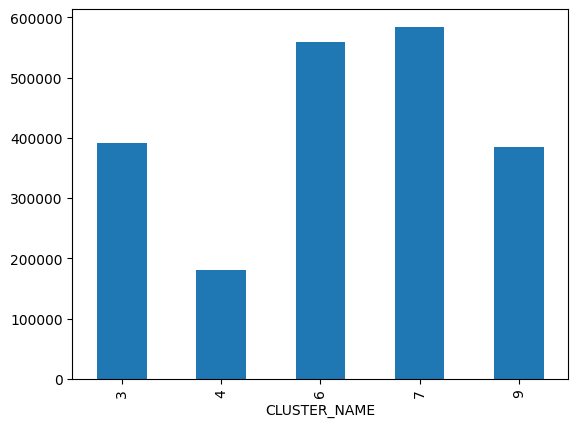

In [34]:
compras_df.groupby('CLUSTER_NAME')['IMPORTE'].mean().plot.bar()

### Probar un modelo no supervisado de anomalias en cuanto a importes

In [35]:
import numpy as np
from scipy.stats import norm

In [36]:
params = norm.fit(compras_df['IMPORTE'])

In [37]:
params

(504548.8796806912, 3467427.545272596)

In [38]:
compras_df['PROB_TOTAL'] = [norm(params[0], params[1]).cdf(x) for x in compras_df['IMPORTE']]

In [40]:
compras_df[compras_df['PROB_TOTAL']>0.95]

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEETS,DIA,MES,AÑO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE,CLUSTER_NAME,PROB_TOTAL
52,115978,"MAXIMO ESPACIO, S.A. DE C.V.",MES0609061B2,F11890-183011-6270,SFA-097-2023,SUMINISTRO DE MOBILIARIO Y EQUIPO DE OFICINA P...,TR,1028876.0,2023-12-08,7.964409e+06,GTOS VARIOS,8,12,2023,1,1.041125e+06,NaN,4,0.984278
97,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,FAME1529-183011-6475,SSP-189-2017,PAGO 12 DE 13 DEL MES DE AGOSTO 2023 DEL CONTR...,TR,1028913.0,2023-12-14,1.797467e+07,GTOS VARIOS,14,12,2023,3,1.041125e+06,True,6,1.000000
98,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS179249-183011-6749,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000117.0,2023-12-28,9.000000e+06,GTOS VARIOS,28,12,2023,3,1.041125e+06,True,6,0.992859
119,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,AF-23-2023-183010-2812,NO APLICA,FONDO SAPS QUINCENA 23-2023,TR,1029060.0,2023-12-20,7.565845e+06,GTOS VARIOS,20,12,2023,2,1.041125e+06,True,6,0.979148
120,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,AF-24-2023-183010-2832,NO APLICA,FONDO SAPS QUINCENA 24-2023,TR,1029120.0,2023-12-22,7.566833e+06,GTOS VARIOS,22,12,2023,2,1.041125e+06,True,6,0.979162
124,126704,SERVICIO DE ADMINISTRACION TRIBUTARIA,SAT970701NN4,ISRASIM112023-183006-71,NO APLICA,PAGO DE RETENCIONES POR SALARIOS Y ASIMILADOS ...,TR,1028847.0,2023-12-08,1.507868e+07,GTOS VARIOS,8,12,2023,3,1.041125e+06,NaN,6,0.999987
126,126704,SERVICIO DE ADMINISTRACION TRIBUTARIA,SAT970701NN4,183006-74,NO APLICA,PARA EL PAGO DE LOS IMPUESTOS GENERADOS POR P...,TR,1029127.0,2023-12-26,7.383863e+06,GTOS VARIOS,26,12,2023,3,1.041125e+06,NaN,6,0.976371
163,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-23-A-183010-2816,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2023, BANCO: BANCA ...",TR,11000335.0,2023-12-19,1.013855e+08,GTOS VARIOS,19,12,2023,55,1.041125e+06,True,6,1.000000
164,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-24-A-183010-2853,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2023, BANCO: BANCA ...",TR,11000336.0,2023-12-28,5.016782e+07,GTOS VARIOS,28,12,2023,55,1.041125e+06,True,6,1.000000
167,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-23-B-183010-2818,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2023, BANCO: BANCO ...",TR,231000236.0,2023-12-19,5.735105e+07,GTOS VARIOS,19,12,2023,55,1.041125e+06,True,6,1.000000


In [41]:
models_sheet={}
for sheet in list(compras_df['SHEETS'].unique()):
    sheet_compras = compras_df[compras_df['SHEETS'] == sheet]
    params = norm.fit(sheet_compras['IMPORTE'])
    models_sheet[sheet] = norm(params[0], params[1])

In [42]:
sheet_prob = []
for i, row in compras_df.iterrows():
    sheet_prob.append(models_sheet[row['SHEETS']].cdf(row['IMPORTE']))
compras_df['PROB_SHEETS'] = sheet_prob

In [46]:
compras_df[compras_df['PROB_SHEETS'] > 0.95]

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEETS,DIA,MES,AÑO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE,CLUSTER_NAME,PROB_TOTAL,PROB_SHEETS
97,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,FAME1529-183011-6475,SSP-189-2017,PAGO 12 DE 13 DEL MES DE AGOSTO 2023 DEL CONTR...,TR,1028913.0,2023-12-14,1.797467e+07,GTOS VARIOS,14,12,2023,3,1.041125e+06,True,6,1.000000,0.997814
124,126704,SERVICIO DE ADMINISTRACION TRIBUTARIA,SAT970701NN4,ISRASIM112023-183006-71,NO APLICA,PAGO DE RETENCIONES POR SALARIOS Y ASIMILADOS ...,TR,1028847.0,2023-12-08,1.507868e+07,GTOS VARIOS,8,12,2023,3,1.041125e+06,NaN,6,0.999987,0.990925
163,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-23-A-183010-2816,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2023, BANCO: BANCA ...",TR,11000335.0,2023-12-19,1.013855e+08,GTOS VARIOS,19,12,2023,55,1.041125e+06,True,6,1.000000,1.000000
164,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-24-A-183010-2853,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2023, BANCO: BANCA ...",TR,11000336.0,2023-12-28,5.016782e+07,GTOS VARIOS,28,12,2023,55,1.041125e+06,True,6,1.000000,1.000000
167,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-23-B-183010-2818,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2023, BANCO: BANCO ...",TR,231000236.0,2023-12-19,5.735105e+07,GTOS VARIOS,19,12,2023,55,1.041125e+06,True,6,1.000000,1.000000
168,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-24-B-183010-2855,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2023, BANCO: BANCO ...",TR,231000237.0,2023-12-28,2.773300e+07,GTOS VARIOS,28,12,2023,55,1.041125e+06,True,6,1.000000,0.999996
178,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-23-BBVA-183010-2817,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2023, BANCO: BBVA B...",TR,328000099.0,2023-12-19,3.565331e+07,GTOS VARIOS,19,12,2023,55,1.041125e+06,True,6,1.000000,1.000000
179,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2023-24-BBVA-183010-2854,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2023, BANCO: BBVA B...",TR,328000100.0,2023-12-28,1.778278e+07,GTOS VARIOS,28,12,2023,55,1.041125e+06,True,6,1.000000,0.997581
206,214872,GOBIERNO DEL ESTADO DE NUEVO LEON,GEN620601DT1,SFA-00108/202-3-183005-95,NO APLICA,REGISTRO DE CONVENIO EN MATERIA DE COMPENSACIO...,TR,604000116.0,2023-12-21,1.358003e+07,GTOS VARIOS,21,12,2023,1,1.041125e+06,NaN,6,0.999919,0.982584
308,320014,"NEXT ENERGY DE MEXICO, S.A. DE C.V.",NEM091002T28,366-183011-6754,TES-217-2020,PAGO DE CONTRAPRESTACION DEL MES DE DICIEMBRE ...,TR,604000118.0,2023-12-29,1.173927e+07,GTOS VARIOS,29,12,2023,1,1.041125e+06,NaN,6,0.999403,0.964110
